In [5]:
import numpy as np
import matplotlib.pyplot as plt

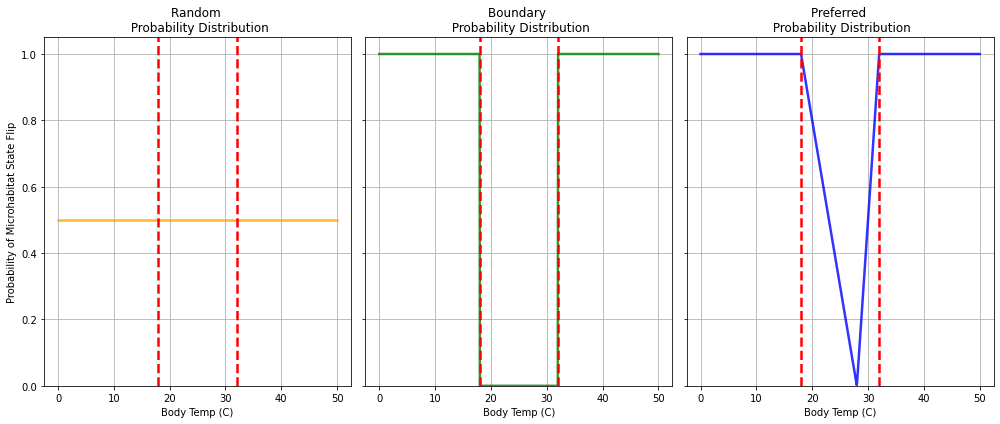

<Figure size 432x288 with 0 Axes>

In [30]:
def random():
    prob_flip = 0.5
    return prob_flip

def boundary_tpref(t_body, t_pref_max, t_pref_min):
    if t_body<=t_pref_min:
        # Leave Burrow to warm up
        prob_flip = 1
    elif t_body>=t_pref_max:
        # go into cool mh to cool down
        prob_flip = 1
    else:
        prob_flip = 0
    return prob_flip

def preferred_topt(t_body, t_pref_opt, t_pref_max, t_pref_min):
    if t_body >= t_pref_opt:
        prob_flip =  ((t_body - t_pref_opt) / (t_pref_max - t_pref_opt))
    elif t_body < t_pref_opt:
        prob_flip =  ((t_pref_opt - t_body) / (t_pref_opt - t_pref_min))
    if prob_flip > 1:
        prob_flip = 1
    return prob_flip

# Set the mode and range
t_opt = 28
t_pref_max = 32 
t_pref_min = 18 

# Create a triangular distribution
t_body_values = np.linspace(0, 50, 1000)
rand_probs = [random() for t_body in t_body_values]
bound_probs = [boundary_tpref(t_body = t_body,t_pref_max = t_pref_max, t_pref_min = t_pref_min) for t_body in t_body_values]
pref_probs = [preferred_topt(t_body = t_body, t_pref_opt=t_opt, t_pref_max = t_pref_max, t_pref_min = t_pref_min) for t_body in t_body_values]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(14, 6), sharey=True)  # Create a 3x1 grid of subplots

# Plot the random probabilities
axs[0].plot(t_body_values, rand_probs, color='orange', linewidth=2.5, alpha=0.8)
axs[0].axvline(t_pref_min, color='r', linestyle='--', linewidth=2.5)
axs[0].axvline(t_pref_max, color='r', linestyle='--', linewidth=2.5)
axs[0].set_ylim(0, 1.05)
axs[0].set_title('Random \n Probability Distribution')
axs[0].set_xlabel('Body Temp (C)')
axs[0].set_ylabel('Probability of Microhabitat State Flip')
#axs[0].legend()
axs[0].grid(True)

# Plot the boundary probabilities
axs[1].plot(t_body_values, bound_probs, color='green', linewidth=2.5, alpha=0.8)
axs[1].axvline(t_pref_min, color='r', linestyle='--', linewidth=2.5)
axs[1].axvline(t_pref_max, color='r', linestyle='--', linewidth=2.5)
axs[1].set_ylim(0, 1.05)
axs[1].set_title('Boundary \n Probability Distribution')
axs[1].set_xlabel('Body Temp (C)')
#axs[1].set_ylabel('Probability')
#axs[1].legend()
axs[1].grid(True)

# Plot the preferred probabilities
axs[2].plot(t_body_values, pref_probs, color='blue', linewidth=2.5, alpha=0.8)
axs[2].axvline(t_pref_min, color='r', linestyle='--', linewidth=2.5)
axs[2].axvline(t_pref_max, color='r', linestyle='--', linewidth=2.5)
axs[2].set_ylim(0, 1.05)
axs[2].set_title('Preferred \n Probability Distribution')
axs[2].set_xlabel('Body Temp (C)')
#axs[2].set_ylabel('Probability')
#axs[2].legend()
axs[2].grid(True)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()
#plt.savefig('sub_models.png', dpi=300)